In [ ]:
pip install pathlib

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from keras.preprocessing import image
import pathlib
from tqdm import tqdm
import PIL as pl
import cv2

In [ ]:
path=pathlib.Path('/content/drive/MyDrive/GA Work/Multiclass/all/')

# Image Preprocessing

In [ ]:
x=[]
for i in tqdm(list(path.glob('**/*.jpg'))):
  x.append(image.load_img(str(i),target_size=(256,256)))

100%|██████████| 410/410 [03:27<00:00,  1.97it/s]


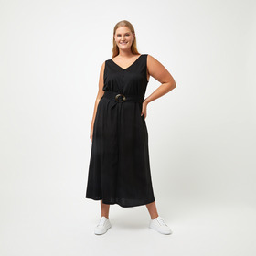

In [ ]:
x[2]

In [ ]:
img_array=[]
for i in x:
  img_array.append(image.img_to_array(i))

In [ ]:
np.shape(img_array)

(410, 256, 256, 3)

In [ ]:
# split in into 3 channel separately and perform min max scale
r=np.array(img_array)[:,:,:,0]/255
g=np.array(img_array)[:,:,:,1]/255
b=np.array(img_array)[:,:,:,2]/255

In [ ]:
r.shape

(410, 256, 256)

In [ ]:
# reshape it from 3D array to 2D array
b_reshape=np.reshape(b,(b.shape[0],b.shape[1]*b.shape[2]))
g_reshape=np.reshape(g,(g.shape[0],g.shape[1]*g.shape[2]))
r_reshape=np.reshape(r,(r.shape[0],r.shape[1]*r.shape[2]))

In [ ]:
b_reshape.shape

(410, 65536)

# PCA Model and test the n_components

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=0.95)
red_fit=pca.fit_transform(r_reshape)

In [ ]:
pca_g=PCA(n_components=0.95)
green_fit=pca_g.fit_transform(g_reshape)

In [ ]:
pca_b=PCA(n_components=0.95)
blue_fit=pca_b.fit_transform(b_reshape)

In [ ]:
print(pca.n_components_)
print(pca_g.n_components_)
print(pca_b.n_components_)

158
168
171


In [ ]:
#Inverse Transformation is necessary to recreate the original dimensions of the base image.
pca=PCA(n_components=171)
red_fit=pca.fit_transform(r_reshape)
red_inverse=pca.inverse_transform(red_fit)

green_fit=pca.fit_transform(g_reshape)
green_inverse=pca.inverse_transform(green_fit)

blue_fit=pca.fit_transform(b_reshape)
blue_inverse=pca.inverse_transform(blue_fit)

In [ ]:
red_inverse.shape

(410, 65536)

In [ ]:
img_compress=np.dstack((red_inverse,green_inverse,blue_inverse))#.astype(np.uint8)

In [ ]:
img_compress.shape

(410, 65536, 3)

In [ ]:
img_compress[0].shape

(65536, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


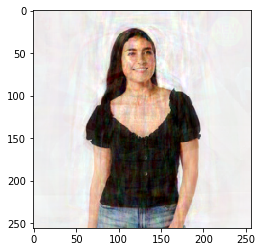

In [ ]:
plt.imshow(img_compress[382].reshape(256,256,3))

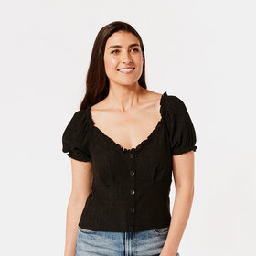

In [ ]:
x[382]

# K Mean Clustering on RGB image

In [ ]:
from sklearn.cluster import KMeans
no_clusters=range(5,200,5)
inertia=[]
for i in no_clusters:
  model=KMeans(n_clusters=i).fit(t_img)
  inertia.append(model.inertia_)